In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import seaborn as sns

In [11]:
#read the file
df1= pd.read_csv('Documents/GitHub/IF/data.csv')
df1.head()

,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
0,4-Jan,8.28,6.93,1.24,106.48,0.018991,0.155518,0.112978,0.182694,0.060531,...,1.055785,0.959459,0.903187,0.992303,0.951446,0.923723,0.019634,-0.005604,0.101181,0.026993
1,4-Feb,8.28,6.77,1.24,106.55,0.019552,0.173791,0.123553,0.197181,0.062438,...,1.058788,0.970922,0.906163,0.992006,0.953512,0.923310,0.019634,-0.005604,0.101181,0.026993
2,4-Mar,8.28,6.64,1.28,108.62,0.020094,0.221002,0.141914,0.227796,0.076555,...,1.058556,0.973295,0.901913,0.993889,0.953608,0.923854,0.019634,-0.005604,0.101181,0.026993
3,4-Apr,8.28,6.56,1.30,107.25,0.019944,0.222297,0.136795,0.204015,0.071361,...,1.063627,0.978012,0.908809,0.990508,0.956701,0.931846,0.019121,-0.014133,0.101861,0.027576
4,4-May,8.28,6.79,1.28,112.35,0.020147,0.194379,0.138205,0.186367,0.066312,...,1.052013,0.978698,0.910850,0.990748,0.955716,0.939221,0.019121,-0.014133,0.101861,0.027576


In [12]:
# choose the data started from 2007-02 and stop on 2018-06
df=df1.drop(range(0, 37),)
df.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv',sep=',')
df=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv')
df=df.iloc[:137, 1:]
df.head()

,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
0,7-Feb,7.75,7.17,1.24,120.45,0.022279,0.184524,0.156641,0.220458,0.088510,...,1.027975,1.004013,0.993803,1.011551,1.007261,0.991670,0.045397,-0.088698,0.112059,0.031747
1,7-Mar,7.74,7.35,1.22,117.28,0.023089,0.217070,0.176128,0.252445,0.102046,...,1.019118,1.010500,1.002075,1.012849,1.004137,0.997451,0.045397,-0.088698,0.112059,0.031747
2,7-Apr,7.72,7.12,1.21,118.83,0.022811,0.230439,0.162478,0.220921,0.093913,...,1.009623,1.019027,1.009303,1.008496,1.010309,1.003305,0.048586,-0.095974,0.112575,0.032114
3,7-May,7.67,7.02,1.22,120.73,0.023013,0.204929,0.176713,0.241660,0.096689,...,1.002863,1.021423,1.018314,1.014282,1.009250,1.008266,0.048586,-0.095974,0.112575,0.032114
4,7-Jun,7.63,7.17,1.23,122.62,0.023133,0.212815,0.175452,0.241184,0.101050,...,0.995454,1.021731,1.033646,1.013798,1.012358,1.009219,0.048586,-0.095974,0.112575,0.032114


In [13]:
# describe the data
df.describe()

,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,USD PMI,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,6.606934,9.931825,0.997664,100.889197,0.023740,0.148240,0.166965,0.258644,0.092731,52.816788,...,0.998311,0.931056,1.090514,0.985733,1.010421,1.002393,0.045746,-0.145655,0.097557,0.030258
std,0.405935,2.664483,0.093441,13.900001,0.001729,0.032706,0.019546,0.045219,0.010789,5.248929,...,0.031560,0.078714,0.066601,0.025015,0.022300,0.025801,0.009771,0.016457,0.004249,0.002138
min,6.100000,6.700000,0.780000,76.770000,0.019337,0.082851,0.118153,0.171324,0.056192,33.100000,...,0.892476,0.783453,0.961065,0.941437,0.956175,0.956126,0.029831,-0.165285,0.092550,0.027129
25%,6.300000,7.600000,0.940000,90.290000,0.022437,0.119854,0.154210,0.219659,0.086557,50.800000,...,0.980989,0.852701,1.018596,0.956353,0.997936,0.989097,0.037068,-0.157901,0.095461,0.028103
50%,6.560000,9.180000,0.970000,102.130000,0.023549,0.145372,0.165935,0.257943,0.093542,53.000000,...,0.995530,0.953135,1.134978,0.990106,1.013528,0.999888,0.045473,-0.146286,0.096866,0.030005
75%,6.830000,12.090000,1.040000,112.340000,0.025204,0.169366,0.178138,0.292126,0.100954,56.500000,...,1.026417,1.002772,1.145675,1.002698,1.026667,1.006810,0.055715,-0.137957,0.097584,0.032272
max,7.750000,16.390000,1.240000,123.750000,0.026837,0.230439,0.230570,0.408002,0.117965,60.800000,...,1.062587,1.058705,1.158477,1.035381,1.071573,1.130300,0.061744,-0.088698,0.112575,0.033481


In [14]:
# operate on the Chinese data firstly. take log on each variable(keep M2YoY unchanged )
df['lCNY'] = np.log(df[['CNY']])
df['lCNY TO'] = np.log(df[['CNY TO']])
df['lCNY PMI'] = np.log(df[['CNY PMI']])
df['lCNY tot']=np.log(df['CNY tot']/df['USD tot'])
df['lCNY tnt']=np.log(df['CNY tnt']/df['USD tnt'])
# take ADF test on these 4 variables to check its stableness
print(ts.adfuller(df['lCNY']))
print(ts.adfuller(df['lCNY TO']))
print(ts.adfuller(df['lCNY PMI']))
print(ts.adfuller(df['CNY M2YoY']))
print(ts.adfuller(df['lCNY tot']))
print(ts.adfuller(df['lCNY tnt']))
print(ts.adfuller(df['CNY nfa']))
# raw data not stable under 1% significant level

(-2.5292043734644083, 0.10852930160833396, 9, 127, {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}, -919.474582428699)
(-1.7426104813970469, 0.40930268802106196, 13, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -255.9668824712403)
(-2.4093719541137077, 0.1391086971498811, 0, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, -438.0800229249131)
(-0.8291174680192122, 0.8104190698316917, 13, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, 347.73798967491734)
(-2.742168071203702, 0.06702124456603893, 0, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, -504.62576446825835)
(-1.047813911447132, 0.7354285034539114, 3, 133, {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}, -809.7784294178066)
(-1.157561342880845, 0.6915803189566732, 9, 127, {'1%': -3.482920063655088, '5%

In [15]:

# take first-order and conduct ADF test
df['difflCNY'] = df['lCNY'].diff(periods = 1)
df['difflCNY TO'] = df['lCNY TO'].diff(periods = 1)
df['difflCNY PMI'] = df['lCNY PMI'].diff(periods = 1)
df['diffCNY M2YoY'] = df['CNY M2YoY'].diff(periods = 1)
df['difflCNY tot'] = df['lCNY tot'].diff(periods = 1)
df['difflCNY tnt'] = df['lCNY tnt'].diff(periods = 1)
df['diffCNY nfa'] = df['CNY nfa'].diff(periods = 1)

print(ts.adfuller(df['difflCNY'].drop(0,)))
print(ts.adfuller(df['difflCNY TO'].drop(0,)))
print(ts.adfuller(df['difflCNY PMI'].drop(0,)))
print(ts.adfuller(df['diffCNY M2YoY'].drop(0,)))
print(ts.adfuller(df['difflCNY tot'].drop(0,)))
print(ts.adfuller(df['difflCNY tnt'].drop(0,)))
print(ts.adfuller(df['diffCNY nfa'].drop(0,)))
# all the variables tend to be stable under 1% significant level

(-3.360420591953739, 0.012384442309500107, 8, 127, {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}, -909.8561315815955)
(-2.7679657459864333, 0.06299733208875796, 12, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -251.3870418698093)
(-11.179691661583478, 2.5190054803175085e-20, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -426.39274506567745)
(-3.6262071658808064, 0.005279321990233068, 12, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, 344.5745165588056)
(-13.091239198973673, 1.7866995776185332e-24, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -494.42487634500105)
(-6.816119451940995, 2.0571235657463436e-09, 2, 133, {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}, -803.8277002338174)
(-3.4911022304641515, 0.008218569783592746, 8, 127, {'1%': -3.48292006

In [16]:
df['lCNY_1'] = 0
size_sample = 136

for i in range(size_sample):
    df.loc[i,'lCNY_1'] = df.loc[i+1,'difflCNY']
    
df.loc[size_sample,'lCNY_1'] = df.loc[0,'difflCNY']

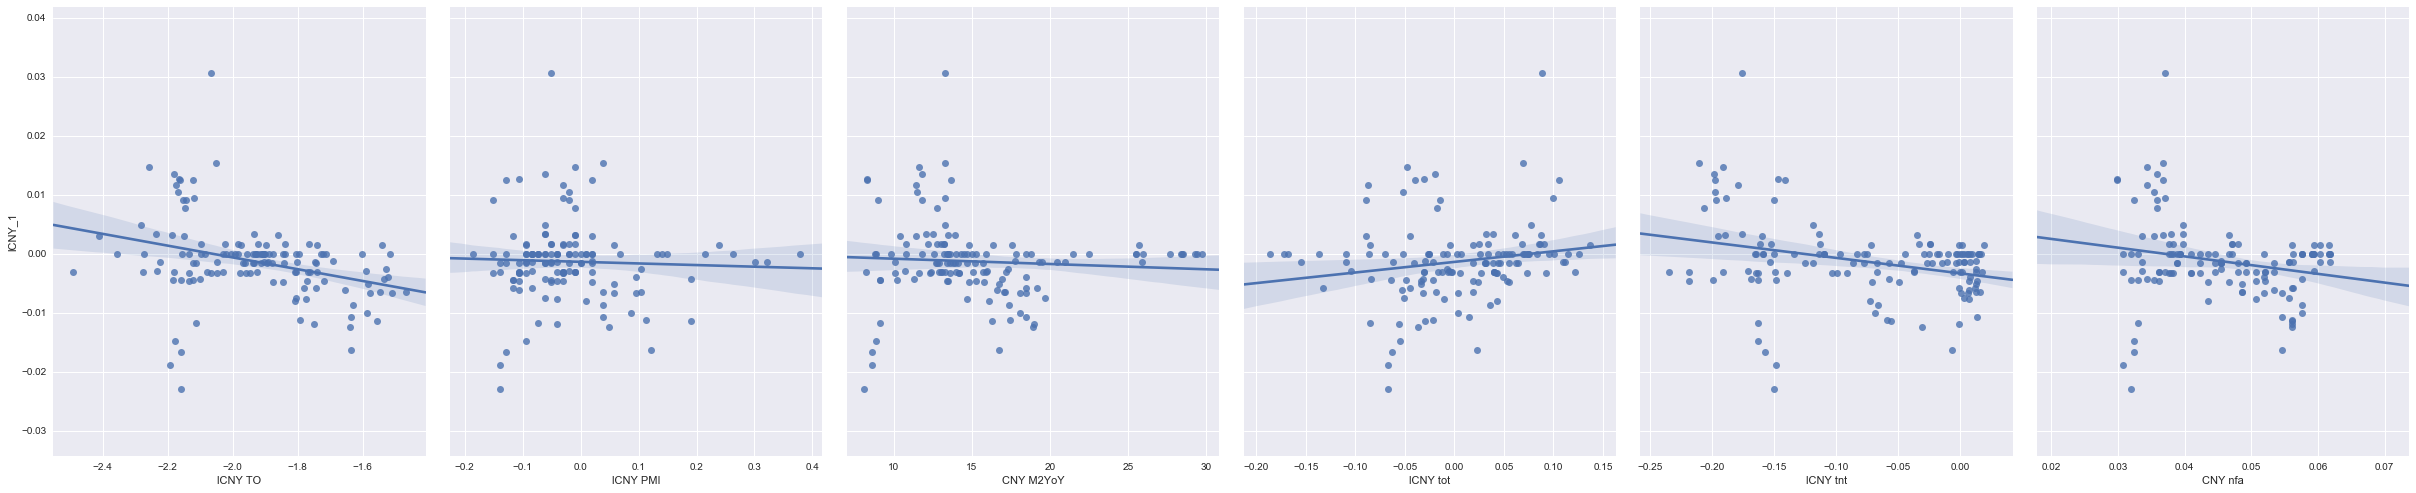

In [17]:
#correlation = df['lCNY','lCNY TO','lCNY PMI','CNY M2YoY'].corr() 
#sns.heatmap(correlation)
#plt.show()
# check relation
sns.pairplot(df, x_vars=['lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa'], y_vars='lCNY_1', size=7, aspect=0.8, kind='reg')  
plt.show()

In [18]:
# run regression with whole data
df['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lCNY_1'], exog=df[['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']], missing='drop')
results = reg_int.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lCNY_1   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     4.249
Date:                Wed, 07 Nov 2018   Prob (F-statistic):           0.000614
Time:                        19:27:52   Log-Likelihood:                 500.65
No. Observations:                 136   AIC:                            -987.3
Df Residuals:                     129   BIC:                            -966.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.011     -1.751      0.0

In [19]:
#results.resid
print(ts.adfuller(results.resid))

(-5.022439372783149, 2.0032193570936627e-05, 8, 127, {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}, -918.4035548847023)


In [20]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 60

fcst_beer60 = np.zeros(size_sample - size_subsample)
fcst_error_beer60 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCNY_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer60[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']]]) - df.loc[size_subsample+i, 'lCNY_1']
    fcst_error_beer60[i] = error
    
fcst_error_beer60=np.where(np.isnan(fcst_error_beer60),0,fcst_error_beer60)
fcst_error_beer60
#fcst_beer

array([-5.94338980e-03, -4.19742167e-03, -6.43205945e-03, -6.14866788e-03,
       -3.51655935e-03, -6.33823360e-03, -2.09409180e-03,  2.21793992e-03,
       -1.92319646e-04, -9.40704615e-04, -9.83250322e-04, -2.05084598e-03,
        1.22945053e-03, -8.94185165e-05,  6.16177628e-03,  2.60900307e-03,
       -1.87181193e-03, -1.84240610e-03,  1.25325955e-04,  2.18488812e-03,
       -1.11868804e-03,  1.83000341e-03,  1.44798196e-03, -3.77107516e-03,
       -3.93188048e-03, -4.89810908e-03, -1.49584190e-03, -1.03942702e-03,
       -9.53888526e-05, -1.08901757e-03,  7.78959415e-04,  5.53391086e-04,
       -5.06471376e-04,  3.19398124e-03, -2.12799511e-03,  1.86477329e-03,
       -5.84550115e-04,  5.34396509e-03,  3.89144683e-03, -1.36315118e-03,
        3.07390765e-04, -3.08737943e-02, -4.88155617e-03,  9.34581494e-03,
        1.34184496e-03, -7.68436767e-03, -1.09400820e-02,  1.14598138e-02,
        9.40326386e-03,  8.60213140e-03, -8.41683262e-03, -8.13206053e-03,
       -1.19716587e-02,  

In [21]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 30

fcst_beer30 = np.zeros(size_sample - size_subsample)
fcst_error_beer30 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCNY_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer30[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']]]) - df.loc[size_subsample+i, 'lCNY_1']
    fcst_error_beer30[i] = error
    
fcst_error_beer30=np.where(np.isnan(fcst_error_beer30),0,fcst_error_beer30)

In [22]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 90

fcst_beer90 = np.zeros(size_sample - size_subsample)
fcst_error_beer90 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCNY_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer90[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCNY TO','lCNY PMI','CNY M2YoY','lCNY tot','lCNY tnt','CNY nfa']]]) - df.loc[size_subsample+i, 'lCNY_1']
    fcst_error_beer90[i] = error
    
fcst_error_beer90=np.where(np.isnan(fcst_error_beer90),0,fcst_error_beer90)

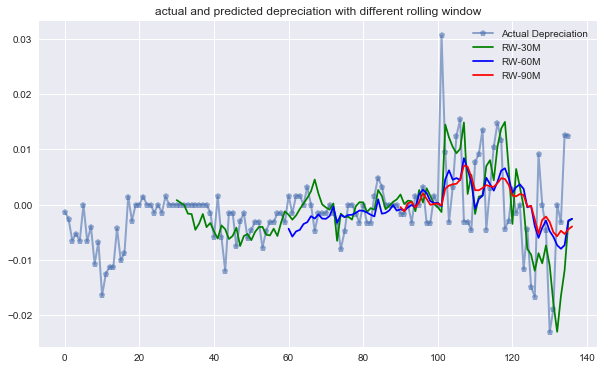

In [23]:
#改变rolling window 长度
df_d = df.set_index('date')
fig, ax = plt.subplots(figsize = (10, 6))

y = df['lCNY_1']
ax.plot(y, 'p-', linewidth=2, label='Actual Depreciation', alpha=0.6)

v1=np.append(np.zeros(30),fcst_beer30)
v1[v1==0]=None
ax.plot(v1, 'g-',label = 'RW-30M')
ax.legend()

v2=np.append(np.zeros(60),fcst_beer60)
v2[v2==0]=None
ax.plot(v2, 'b-',label = 'RW-60M')
ax.legend()

v3=np.append(np.zeros(90),fcst_beer90)
v3[v3==0]=None
ax.plot(v3, 'r-',label = 'RW-90M')
ax.legend()

ax.set_title('actual and predicted depreciation with different rolling window') 

plt.show()

In [26]:
# Compute RMSE for the Beer model
rmse_beer60 = np.sqrt(np.mean(fcst_error_beer60**2))
rmse_beer60

0.007876806321472404

In [27]:
rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lCNY_1']**2))
rmse_rw

0.00972578052315789

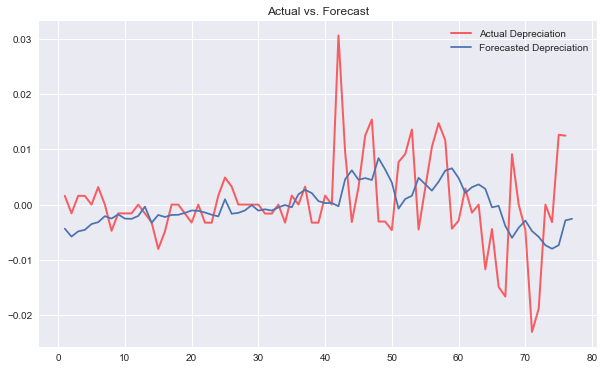

In [28]:
df_d = df.set_index('date')
size_subsample=60
fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()
# size_subsample no need to +1
#x=df.loc[size_subsample: size_sample,'date']
yB1 = df.loc[size_subsample: size_sample, 'lCNY_1']
ax.plot(x, yB1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yB2 = fcst_beer60
ax.plot(x, yB2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()

In [29]:
#比值偏离度
devB1=(yB1-yB2)/yB2
devB1.describe()

count     76.000000
mean      -0.095814
std       15.197884
min     -102.839207
25%       -1.388370
50%       -1.000000
75%        1.089986
max       62.777851
Name: lCNY_1, dtype: float64

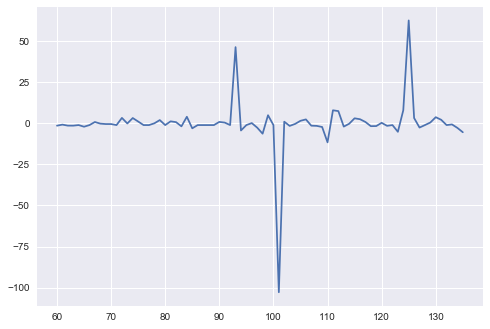

In [30]:
devB1.plot()
plt.show()

In [31]:
#差值偏离度
devB2=yB1-yB2
devB2.describe()

count    76.000000
mean      0.000652
std       0.007954
min      -0.018232
25%      -0.002755
50%       0.000692
75%       0.004830
max       0.030874
Name: lCNY_1, dtype: float64

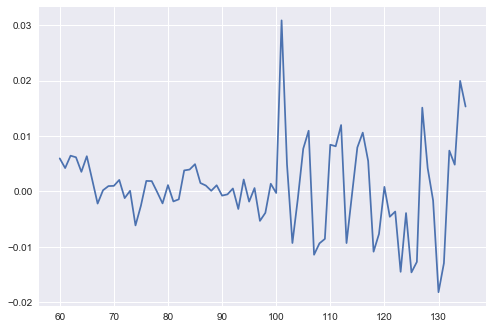

In [32]:
devB2.plot()
plt.show()

In [33]:
#homework replicate
dfhw1 = pd.read_csv('Documents/GitHub/IF/data-HW.csv')
dfhw1.head()

,date,CNY,ZA,CHF,JPY,C_IBR,Z_IBR,CH_IBR,J_IBR,U_IBR,...,C_PMI,Z_PMI,CH_PMI,J_PMI,U_PMI,C_REER,Z_REER,CH_REER,J_REER,U_REER
0,Jan-07,7.7898,7.19,1.24,120.58,1.94,8.70,2.12,0.43,5.10,...,55.1,50.6,62.4,NaN,49.5,88.38,92.23,98.5578,84.74,108.91
1,Feb-07,7.7546,7.17,1.24,120.45,1.91,8.66,2.13,0.59,5.11,...,53.1,57.8,64.4,53.0,51.9,89.59,91.48,98.7527,83.20,108.37
2,Mar-07,7.7391,7.35,1.22,117.28,1.95,8.28,2.24,0.56,5.02,...,56.1,59.1,61.5,52.5,50.7,88.16,88.88,98.8296,85.50,108.65
3,Apr-07,7.7247,7.12,1.21,118.83,2.05,8.28,2.30,0.58,4.84,...,58.6,54.0,61.8,52.3,52.6,87.07,91.24,99.9483,83.44,107.55
4,May-07,7.6704,7.02,1.22,120.73,2.08,8.50,2.36,0.58,4.71,...,55.7,55.5,60.4,51.4,52.5,87.66,92.23,100.1821,81.45,106.82


In [34]:
# choose the data started from 2007-02 and stop on 2018-06
dfhw=dfhw1.drop(range(0, 1),)
dfhw.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata1.csv',sep=',')
dfhw=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata1.csv')
dfhw=dfhw.iloc[:137, 1:]
dfhw.tail()

,date,CNY,ZA,CHF,JPY,C_IBR,Z_IBR,CH_IBR,J_IBR,U_IBR,...,C_PMI,Z_PMI,CH_PMI,J_PMI,U_PMI,C_REER,Z_REER,CH_REER,J_REER,U_REER
132,Feb-18,6.3162,11.82,0.93,107.82,3.24,7.12,-0.86,-0.18,1.66,...,50.3,52.3,65.5,54.1,60.8,127.61,85.87,101.0719,74.40,110.55
133,Mar-18,6.3220,11.84,0.95,106.00,3.11,7.06,-0.79,-0.14,1.72,...,51.5,48.3,60.3,53.1,59.3,125.87,86.03,101.4584,75.77,111.43
134,Apr-18,6.2975,12.09,0.97,107.43,2.72,6.98,-0.80,-0.12,1.81,...,51.4,48.8,63.6,53.8,57.3,126.34,85.02,101.6703,74.66,111.85
135,May-18,6.3758,12.53,1.00,109.69,2.77,7.01,-0.90,-0.13,1.92,...,51.9,49.8,62.4,52.8,58.7,127.26,84.02,102.0573,74.51,115.38
136,Jun-18,6.4556,13.30,0.99,110.03,3.01,7.03,-0.84,-0.12,1.92,...,51.5,44.8,61.8,53.0,60.2,126.42,80.35,102.0615,74.95,117.31


In [35]:
# compute the change in the exchange rate: take log and first difference to compute depreciation (dep)
dfhw['lCNY'] = np.log(dfhw[['CNY']])
dfhw['lCNY_1'] = dfhw['lCNY'].diff(periods = 1)

In [36]:
# Create a new column to reindex depreciation - why?
dfhw['lCNY_1'] = 0
size_sample = 136

for i in range(size_sample):
    dfhw.loc[i,'lCNY_1'] = dfhw.loc[i+1,'lCNY']
    dfhw.loc[size_sample,'lCNY_1'] = dfhw.loc[0,'lCNY']

In [37]:
#Next we compute the independent variable: interest differential across US and China.
dfhw['int_diff'] = dfhw['C_IBR'] - dfhw['U_IBR']

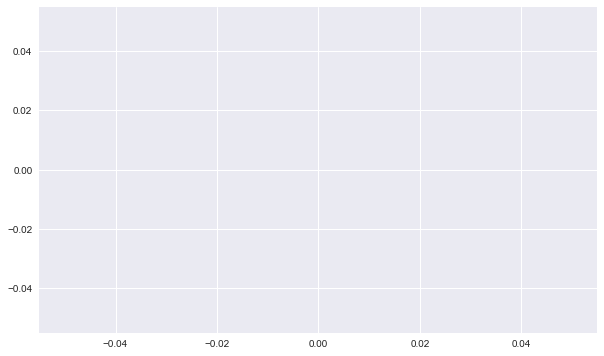

In [40]:
#Let's see if exchange rate depreciation is correlated with the interest differential by plotting them in a graph
#plt.style.use('seaborn')
#fig, ax = plt.subplots(figsize = (10, 6))
#ax.plot(x=dfhw['int_diff'], y=df['lCNY_1'], kind='scatter')
#plt.show()

In [55]:
# the pattern is not that clear so we run the regression
dfhw['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lCNY_1'], exog=dfhw[['const', 'int_diff']], missing='drop')
results = reg_int.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lCNY_1   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9373
Date:                Wed, 07 Nov 2018   Prob (F-statistic):              0.335
Time:                        19:34:08   Log-Likelihood:                 488.86
No. Observations:                 136   AIC:                            -973.7
Df Residuals:                     134   BIC:                            -967.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.001     -2.156      0.0

In [56]:
# Now we do rolling window to forecast through UIP model
size_sample = 137
size_subsample = 60

# How many regressions can we run? How many forecast errors can we compute?
fcst_int = np.zeros(size_sample - size_subsample)
fcst_error_int = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    reg_intsub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCNY_1'], exog=dfhw.loc[dfhw.index[i:size_subsample+i],['const', 'int_diff']], missing='drop')
    results_sub = reg_intsub.fit()
    
    fcst_int[i] = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'int_diff']]])
    error = results_sub.predict(exog = [1, dfhw.loc[size_subsample+i,'int_diff']]) - df.loc[size_subsample+i, 'lCNY_1']
    fcst_error_int[i] = error

fcst_error_int=np.where(np.isnan(fcst_error_int),0,fcst_error_int)    
fcst_error_int

array([-4.79555074e-03, -1.38845964e-03, -4.49323215e-03, -4.50480295e-03,
       -2.95137051e-03, -6.08284052e-03, -2.56491938e-03,  2.30255968e-03,
       -8.34712576e-04, -1.03168970e-03, -1.03776436e-03, -2.78339149e-03,
       -9.85735576e-04,  6.41847796e-04,  5.65035257e-03,  2.25362974e-03,
       -3.73437077e-03, -3.39241121e-03, -1.48240302e-03,  6.00972100e-05,
       -3.13806252e-03, -2.33036152e-04, -5.87587488e-04, -4.97623737e-03,
       -7.38340165e-03, -5.40039172e-03, -2.00402482e-03, -1.96326248e-03,
       -1.89645607e-03, -1.94201497e-03, -2.86891122e-04, -2.61057643e-04,
       -1.84807171e-03,  1.49891929e-03, -3.41792025e-03, -1.69012068e-03,
       -4.94471932e-03,  1.67527698e-03,  1.54749795e-03, -4.01527147e-03,
       -2.65344743e-03, -3.27012020e-02, -1.04457978e-02,  2.91216444e-03,
       -2.78431444e-03, -1.19407164e-02, -1.40541802e-02,  5.93438012e-03,
        5.95786308e-03,  7.33508084e-03, -5.47808179e-03, -6.46600185e-03,
       -1.05336079e-02,  

In [57]:
#Now we do the same to obtain forecast errors made by the Taylor-rule model:
# Taylor-Rule model

# inflation differential
dfhw['pi_diff'] = dfhw['C_CPI'] - dfhw['U_CPI']

fcst_tr = np.zeros(size_sample - size_subsample)
fcst_error_tr = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    # Create a column to store the output gap difference and update it in each loop
    y_C = dfhw['C_PMI'] - np.mean(dfhw.loc[i:size_subsample-1+i, 'C_PMI'])
    y_U = dfhw['U_PMI'] - np.mean(dfhw.loc[i:size_subsample-1+i, 'U_PMI'])
    dfhw['y_diff'] = y_C - y_U
    
    reg_trsub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCNY_1'], exog=dfhw.loc[dfhw.index[i:size_subsample+i],['const', 'pi_diff','y_diff']], missing='drop')
    results_sub = reg_trsub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_tr[i] = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'pi_diff','y_diff']]])
    error = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'pi_diff','y_diff']]]) - df.loc[size_subsample+i, 'lCNY_1']
    fcst_error_tr[i] = error
    
fcst_error_tr=np.where(np.isnan(fcst_error_tr),0,fcst_error_tr)
fcst_error_tr

array([-2.62562642e-03, -5.79151173e-04, -3.99710560e-03, -3.86265372e-03,
       -1.01787475e-03, -3.97335709e-03, -3.23722678e-04,  5.31121013e-03,
        2.53302041e-03,  8.10843784e-04, -1.45026319e-04, -8.13770772e-04,
       -3.33620265e-04,  2.06214891e-03,  5.88165109e-03,  3.32290644e-03,
       -1.70157476e-03, -1.45833319e-03, -2.88642932e-04,  5.56026813e-04,
       -3.12258887e-03,  6.88872346e-04,  1.59912497e-03, -3.34670905e-03,
       -6.39134401e-03, -4.61099501e-03,  3.65256790e-04, -5.56331235e-04,
       -1.51690543e-04,  1.94490782e-05,  2.22203193e-03,  2.03304111e-03,
        6.62740428e-04,  3.52339512e-03, -2.76455923e-03, -1.32625613e-03,
       -5.34949005e-03,  1.09236742e-03,  7.60328416e-04, -3.45937931e-03,
       -1.79982983e-03, -3.25379049e-02, -1.12760591e-02,  1.93870897e-03,
       -3.65342128e-03, -1.26725428e-02, -1.45457845e-02,  5.24518062e-03,
        3.59434606e-03,  4.54417853e-03, -7.37018690e-03, -8.66397733e-03,
       -1.34766418e-02,  

In [58]:
# compute RMSE for the interest differential model
rmse_int = np.sqrt(np.mean(fcst_error_int**2))
rmse_int

0.007987451592080455

In [59]:
# Compute RMSE for the Taylor rule model
rmse_tr = np.sqrt(np.mean(fcst_error_tr**2))
rmse_tr

0.007793628425911119

In [61]:
rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lCNY_1']**2))
rmse_rw

0.007757752090891382

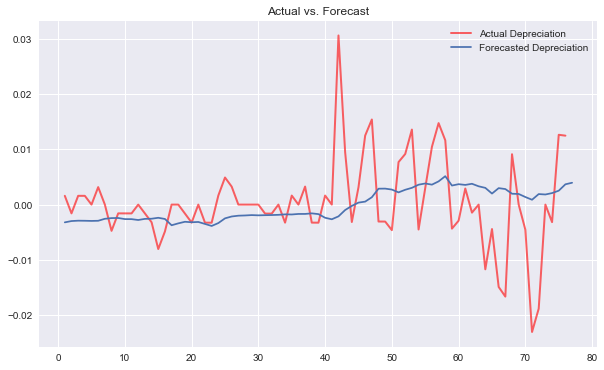

In [62]:
#实际值和UIP model值比较
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

yU1= df.loc[size_subsample: size_sample, 'lCNY_1']
ax.plot(x, yU1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yU2= fcst_int
ax.plot(x, yU2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()

In [63]:
#比值偏离度
devU1=(yU1-yU2)/yU2
devU1.describe()

count    76.000000
mean     -0.812766
std       5.531027
min     -27.278283
25%      -1.951205
50%      -1.000000
75%       0.401019
max      22.114696
Name: lCNY_1, dtype: float64

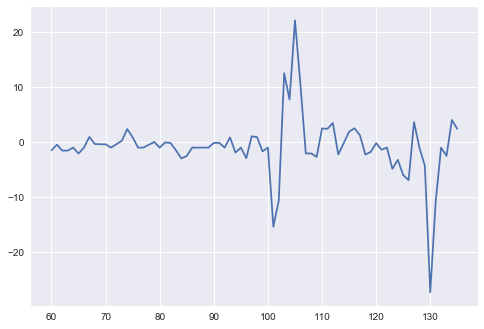

In [64]:
devU1.plot()
plt.show()

In [65]:
#差值偏离度
devU2=yU1-yU2
devU2.describe()

count    76.000000
mean      0.000616
std       0.008069
min      -0.023901
25%      -0.002266
50%       0.001435
75%       0.004577
max       0.032701
Name: lCNY_1, dtype: float64

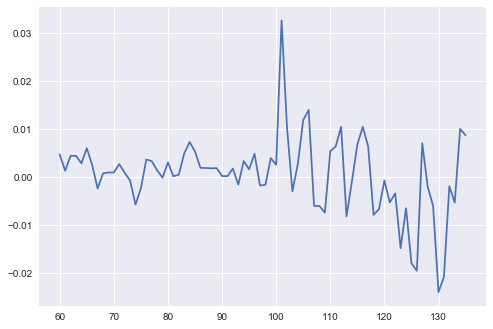

In [66]:
devU2.plot()
plt.show()

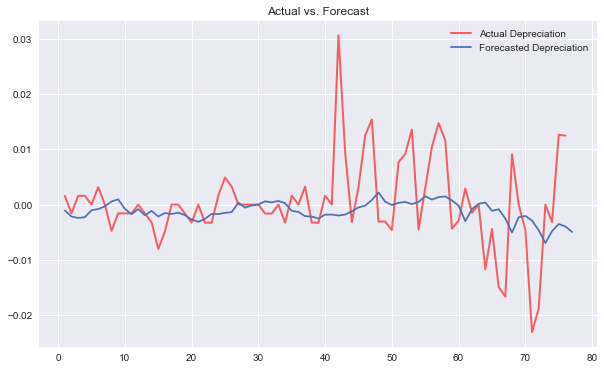

In [68]:
#实际值和泰勒值比较
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

yT1 = df.loc[size_subsample: size_sample, 'lCNY_1']
ax.plot(x, yT1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yT2 = fcst_tr
ax.plot(x, yT2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()

In [69]:
#比值偏离度
devT1=(yT1-yT2)/yT2
devT1.describe()

count     76.000000
mean       1.568665
std       21.725470
min      -66.043570
25%       -2.586405
50%       -1.000000
75%        1.086137
max      153.148557
Name: lCNY_1, dtype: float64

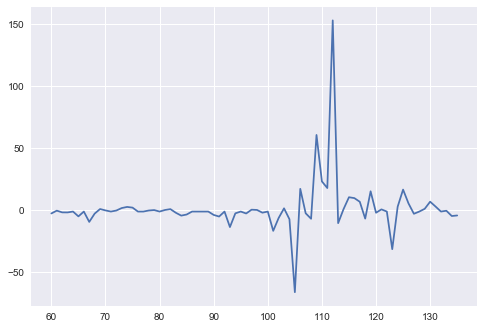

In [70]:
devT1.plot()
plt.show()

In [71]:
devT2=yT1-yT2
devT2.describe()

count    76.000000
mean      0.001494
std       0.007752
min      -0.020129
25%      -0.002102
50%       0.000445
75%       0.003979
max       0.032538
Name: lCNY_1, dtype: float64

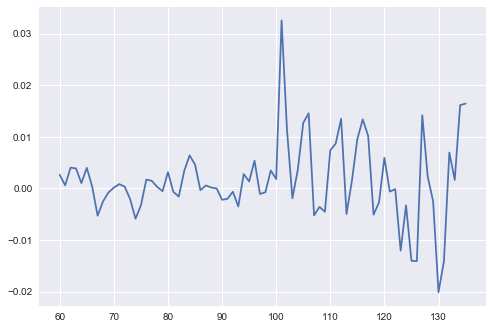

In [72]:
devT2.plot()
plt.show()

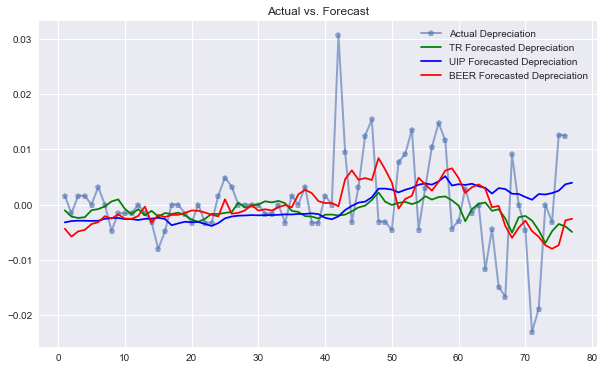

In [74]:
#预测线叠加
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

y1 = df.loc[size_subsample: size_sample, 'lCNY_1']
ax.plot(x, y1, 'p-', linewidth=2, label='Actual Depreciation', alpha=0.6)


ax.plot(x, yT2, 'g-',label = 'TR Forecasted Depreciation')
ax.legend()


ax.plot(x, yU2, 'b-',label = 'UIP Forecasted Depreciation')
ax.legend()


ax.plot(x, yB2, 'r-',label = 'BEER Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()

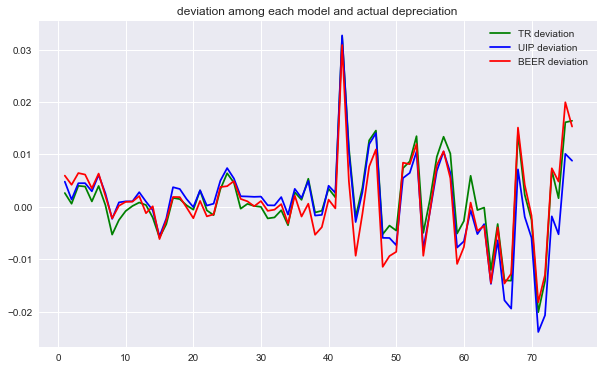

In [75]:
fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

ax.plot(x, devT2, 'g-',label = 'TR deviation')
ax.legend()


ax.plot(x, devU2, 'b-',label = 'UIP deviation')
ax.legend()


ax.plot(x, devB2, 'r-',label = 'BEER deviation')
ax.legend()

ax.set_title('deviation among each model and actual depreciation ') 

plt.show()